# Optimization Methods for Data Science

##### Authors: Mohammad Matin Parvanian , Bahador Mirzazadeh, Sadaf Jamali , Seyedeh Moones Sheibani

##### HW1
##### Deadline: 05/15/2023

In the first part, the random data has been generated with the number of 1000 and 2 features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import process_time
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

In [33]:
np.random.seed(123)
X, y = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, center_box=(-4, 4))

# std_dev = 0.9
# # Add noise to the features
# noise = np.random.normal(0, std_dev, X.shape)
# X_noise = X + noise

X_unlabeled, X_labeled, y_unlabeled, y_labeled = train_test_split(X, y, test_size=0.2, random_state=42)

y_labeled = y_labeled * 2. - 1.
y_unlabeled = y_unlabeled * 2. - 1.

Size of X =  500
Size of y =  500

Size of Unlabeled X =  400
Size of Unlabeled y =  400

Size of Labeled X =  100
Size of Labeled y =  100



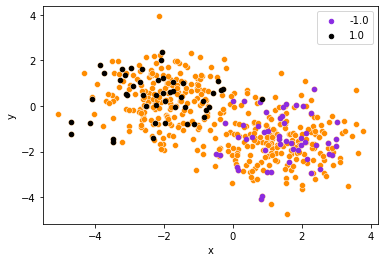

In [3]:
print("Size of X = ", X.shape[0])
print("Size of y = ", y.shape[0])
print()
print("Size of Unlabeled X = ", X_unlabeled.shape[0])
print("Size of Unlabeled y = ", y_unlabeled.shape[0])
print()
print("Size of Labeled X = ", X_labeled.shape[0])
print("Size of Labeled y = ", y_labeled.shape[0])
print()

data = pd.DataFrame(dict(x=X_labeled[:, 0], y=X_labeled[:, 1], label=y_labeled))
fig, ax = plt.subplots()
grouped = data.groupby('label')
sns.scatterplot(ax=ax, x=X[:, 0], y=X[:, 1], color='darkorange')
colors = {-1: 'blueviolet', 1: 'black'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

### <b>Similarity Measure function</b>
For this task we consider different similarity functions. Among all of them we choosed The Euclidean distance and The Manhattan distance. They are both good functions but there is a difference between these two functions which made us to choose The Euclidean distance.The Euclidean distance between two points is calculated as the straight-line distance between two sets of points. On the other hand The Manhattan distance is measured by moving along the edges of a city block.
<ol>
  <b>Euclidean Distance:</b>
  At first, for similarity, the similarity measure function has been defined as below:

  $$d_E(\vec{x}, \vec{y}) = e^{\sqrt{\sum_{i=1}^n (x_i - y_i)^2}}$$



  So the similarity matrix is defined as below:

  $$\omega_{ij}={e^{\sqrt{(x_{1i}-x_{1j})^2+(x_{2i}-x_{2j})^2}}}$$

  ${x_1}$ refer to the first dimension and ${x_2}$ is the second dimension in 2D.

  ${i ,j}$ are two indexes for labeled and unlabeled data. 

  Therefore the matrix is as below:

  $$
\omega_{ij}= \begin{bmatrix}
{e^{\sqrt{(x_{11}-x_{11})^2+(x_{21}-x_{21})^2}}} & {e^{\sqrt{(x_{11}-x_{12})^2+(x_{21}-x_{22})^2}}} & \cdots \\
{e^{\sqrt{(x_{12}-x_{11})^2+(x_{22}-x_{21})^2}}} & \ddots & \cdots \\
\vdots & \cdots & \cdots \\
\end{bmatrix}
$$
</ol>

<b>Defining Similarity functions</b>

<b> Initializing random labels for unlabeled data</b>

<b>Defining the similarity matrix</b>

In [4]:
def similarity(x_Unlabeled, x_labeled):
    wij = np.zeros((len(x_labeled), len(x_Unlabeled)))
    wij_bar = np.zeros((len(x_Unlabeled), len(x_Unlabeled)))

    wij = np.exp(-euclidean_distances(x_labeled, x_Unlabeled, squared=False))
    wij_bar = np.exp(-euclidean_distances(x_Unlabeled, x_Unlabeled, squared=False))

    return wij, wij_bar

In [5]:
wij, wij_bar = similarity(X_unlabeled, X_labeled)

In [6]:
print(wij, wij.shape)

[[0.0021027  0.01560277 0.17839446 ... 0.00286107 0.0850984  0.00180831]
 [0.10942451 0.03644872 0.00321889 ... 0.19547396 0.00152674 0.26744166]
 [0.02728369 0.06521905 0.13524723 ... 0.01678173 0.34660217 0.01612156]
 ...
 [0.00364472 0.02384476 0.26417272 ... 0.00440949 0.15213848 0.00295932]
 [0.05228652 0.37749759 0.19742003 ... 0.07436416 0.06877094 0.05022761]
 [0.28541536 0.24955191 0.02552124 ... 0.39717916 0.01325465 0.39015902]] (100, 400)


In [7]:
print(wij_bar, wij_bar.shape)

[[1.         0.07826717 0.01069151 ... 0.15271091 0.00953676 0.3428785 ]
 [0.07826717 1.         0.08738964 ... 0.18336401 0.0263699  0.10289034]
 [0.01069151 0.08738964 1.         ... 0.01602869 0.11553185 0.00997107]
 ...
 [0.15271091 0.18336401 0.01602869 ... 1.         0.00609471 0.38095529]
 [0.00953676 0.0263699  0.11553185 ... 0.00609471 1.         0.00561075]
 [0.3428785  0.10289034 0.00997107 ... 0.38095529 0.00561075 1.        ]] (400, 400)


### <b>Cost function and it's derivative</b>


 Cost function:
  $$ \min_{y\in{R^u}} \sum_{i=1}^l\sum_{j=1}^u \omega_{ij}(y^{j}-\bar{y}^{i})^2 + \sum_{i=1}^u\sum_{j=1}^u \bar{\omega}_{ij}(y^{j}-y^{i})^2 $$

Gradient with respect to $y^{j}$:
$$\nabla_{y^{j}} f(y)=2\sum_{i=1}^l \omega_{ij}(y^{j}-\bar{y}^{i})+2 \sum_{i=1}^u \bar{\omega}_{ij}(y^{j}-y^{i})$$

$u$ : unlabeled data

$l$ : labeled data

$y$ : predicted label (parameters)

$\bar{y}$ : determined label

$\omega_{ij}$ : similarity measure matrix between labeled and unlabeled data

$\bar{\omega}_{ij}$ : similarity measure matrix between unlabeled data


<b>Defining cost function and its derivative</b>

In [8]:
def cost_function(wij, wij_bar, y_unlabel, y_label):
  
    term1 = np.sum(wij * np.square(np.subtract(y_unlabel, y_label[:, np.newaxis])))
    term2 = np.sum(wij_bar * np.square(np.subtract(y_unlabel[:, np.newaxis], y_unlabel)))

    return term1 + term2

In [9]:
def dev_cost_function(wij, wij_bar, y_unlabel, y_label, method, index=1):

    if method == 'GD':
        y_label_matrix = np.tile(y_label, (y_unlabel.shape[0], 1))
        y_unlabel_array = np.reshape(y_unlabel, (y_unlabel.shape[0], 1))
        wij_reshaped = wij.T
        sub1 = y_label_matrix - y_unlabel_array
        mat1 = wij_reshaped * sub1
        term1 = np.sum(mat1, axis=1)

        y_unlabel_matrix = np.tile(y_unlabel, (y_unlabel.shape[0], 1))
        y_unlabel_array = np.reshape(y_unlabel, (y_unlabel.shape[0], 1))
        wij_bar_reshaped = wij_bar.T
        sub2 = y_unlabel_matrix - y_unlabel_array
        mat2 = wij_bar_reshaped * sub2
        term2 = np.sum(mat2, axis=1)
        dev = -2. * (term1 + term2)

    elif method == 'RBCGD':
        y_mat = np.reshape(y_label, (y_label.shape[0], 1))
        y_un = y_unlabel[index]
        y_mat = y_un - y_mat
        w = np.reshape(wij[:, index], (wij.shape[0], 1)).T
        term1 = float(np.dot(w, y_mat))

        y_mat = np.reshape(y_unlabel, (y_unlabel.shape[0], 1))
        y_un = y_unlabel[index]
        y_mat = y_un - y_mat
        w = np.reshape(wij_bar[:, index], (wij_bar.shape[0], 1)).T
        term2 = float(np.dot(w, y_mat))
        dev = 2. * (term1 + term2)
        
    elif method == 'BCGDGS':
        y_mat = np.reshape(y_label, (y_label.shape[0], 1))
        y_un = y_unlabel[index]
        y_mat = y_un - y_mat
        w = np.reshape(wij[:, index], (wij.shape[0], 1)).T
        term1 = float(np.dot(w, y_mat))

        y_mat = np.reshape(y_unlabel, (y_unlabel.shape[0], 1))
        y_un = y_unlabel[index]
        y_mat = y_un - y_mat
        w = np.reshape(wij_bar[:, index], (wij_bar.shape[0], 1)).T
        term2 = float(np.dot(w, y_mat))
        mu = np.sqrt(np.sum(wij_bar ** 2, axis=1))
        dev = (2. * (term1 + term2)) / (mu[index] ** 2.)

    else:
        raise ValueError("Invalid method provided")
    
    return dev

In [10]:
def label_normalizer(labels):
    return np.round((labels + 1) / 2) * 2 - 1

In [11]:
def accuracy(current, target):
    return np.sum(np.equal((current/2 + .5).round() * 2 - 1, target)) / len(target)

In [12]:
def plot_learnin_curve(time, cost_func_val, time_tracking_val, acc_val, method_name):
    print(method_name)
    print("CPU time:", time)

    sns.lineplot(x= range(len(cost_func_val)),y=cost_func_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()
    sns.lineplot(x= time_tracking_val,y=cost_func_val)
    plt.xlabel("Seconds")
    plt.ylabel("Loss")
    plt.show()
    
    sns.lineplot(x= range(len(acc_val)),y=acc_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.show()

    sns.lineplot(x= time_tracking_val,y=acc_val)
    plt.xlabel("Seconds")
    plt.ylabel("Accuracy")
    plt.show()
    return

In [13]:
def plot_points(unlabeled_X, unlabeled_y, indices):
    df = pd.DataFrame(dict(x=unlabeled_X[:, indices[0]], y=unlabeled_X[:, indices[1]], label=unlabeled_y))
    colors = {-1:'blueviolet', 1:'black'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()
    return

In [14]:
def armijo_search(wij, wij_bar, y_unlabel, y_label, dev, alpha, c, max_iter=20):
    cost_func = cost_function(wij, wij_bar, y_unlabel, y_label)
    der_cost_func = np.sum(dev)
    num_iter = 0
    while num_iter < max_iter:
        new_y_unlabel = y_unlabel - (alpha * dev)
        new_cost_func = cost_function(wij, wij_bar, new_y_unlabel, y_label)
        if new_cost_func <= cost_func - (c * alpha * der_cost_func):
            break
        alpha /= 2.0
        num_iter += 1
    return alpha, new_y_unlabel

In [15]:
def gd_method(wij, wij_bar, y_unlabeled, y_labeled, lr, iterations):
    y_unlabeled_pred = np.random.rand(len(X_unlabeled)) * 0.01
    cost_func_GD = []
    time_tracking_GD = []
    acc_val_GD = []
    
    t_start = process_time()
    
    for _ in range(iterations):
        derivative = dev_cost_function(wij, wij_bar, y_unlabeled_pred, y_labeled, method='GD')
        lr, y_unlabeled_pred = armijo_search(wij, wij_bar, y_unlabeled_pred, y_labeled, derivative, lr, c=0.01, max_iter=100)
        acc_val_GD.append(accuracy(y_unlabeled_pred, y_unlabeled))
        cost_func_GD.append(cost_function(wij, wij_bar, y_unlabeled_pred, y_labeled))
        time_tracking_GD.append(process_time() - t_start)
    t_stop = process_time()
    
    return cost_func_GD, acc_val_GD, time_tracking_GD, t_stop - t_start, y_unlabeled_pred

In [16]:
def rbcgd_method(wij, wij_bar, y_unlabeled, y_labeled, lr, iterations, num_blocks, block_size):
    y_unlabeled_pred = np.random.rand(len(X_unlabeled)) * 0.01
    cost_func_RBCGD = []
    time_tracking_RBCGD = []
    acc_val_RBCGD = []

    t_start = process_time()

    for _ in range(iterations):
        for _ in range(num_blocks):
            block_index = np.random.randint(0, num_blocks * block_size)
            derivative = dev_cost_function(wij, wij_bar, y_unlabeled_pred, y_labeled, method='RBCGD', index=block_index)
            y_unlabeled_pred[block_index] = y_unlabeled_pred[block_index] - (lr * derivative)
        acc_val_RBCGD.append(accuracy(y_unlabeled_pred, y_unlabeled))    
        cost_func_RBCGD.append(cost_function(wij, wij_bar, y_unlabeled_pred, y_labeled))
        time_tracking_RBCGD.append(process_time() - t_start)

    t_stop = process_time()

    return cost_func_RBCGD, acc_val_RBCGD, time_tracking_RBCGD, t_stop - t_start, y_unlabeled_pred

In [17]:
def bcgdgs_method(wij, wij_bar, y_unlabeled, y_labeled, lr, iterations, num_blocks, block_size):
    y_unlabeled_pred = np.random.rand(len(X_unlabeled)) * 0.01
    cost_func_BCGDGS = []
    time_tracking_BCGDGS = []
    acc_val_BCGDGS = []
    
    t_start = process_time()

    for _ in range(iterations):
        for i in range(num_blocks):
            start = i * block_size
            end = (i + 1) * block_size
            if end > y_unlabeled_pred.shape[0]:
                end = y_unlabeled_pred.shape[0]
            indices = np.arange(start, end)
            derivative = dev_cost_function(wij, wij_bar, y_unlabeled_pred, y_labeled, method='BCGDGS', index=indices)
            y_unlabeled_pred[indices] = y_unlabeled_pred[indices] - (lr * derivative)
        acc_val_BCGDGS.append(accuracy(y_unlabeled_pred, y_unlabeled))
        
        cost_func_BCGDGS.append(cost_function(wij, wij_bar, y_unlabeled_pred, y_labeled))
        
        time_tracking_BCGDGS.append(process_time() - t_start)

    t_stop = process_time()

    return cost_func_BCGDGS, acc_val_BCGDGS, time_tracking_BCGDGS, t_stop - t_start, y_unlabeled_pred

### <b>Gradient Descent</b>


In [18]:
learning_rate = 0.0003
num_iterations = 100

cost_func_GD, acc_val_GD, time_tracking_GD, time_GD, y_unlabeled_pred = gd_method(wij, wij_bar, y_unlabeled, y_labeled, learning_rate, num_iterations)

Visualizing the result to see that the assignment is correct or not!

Gradient Descent
CPU time: 0.109375


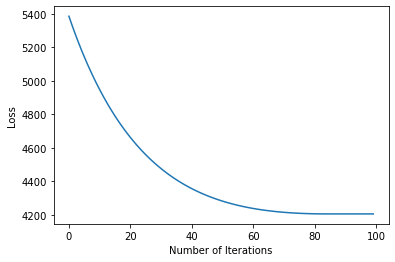

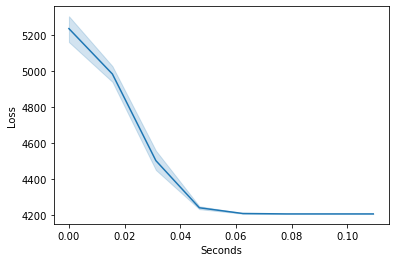

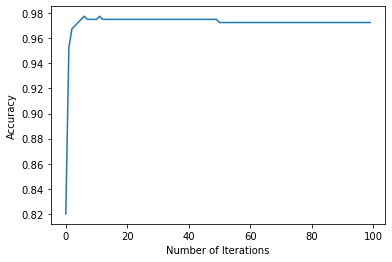

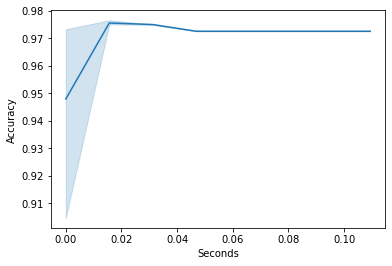

In [19]:
plot_learnin_curve(time_GD, cost_func_GD, time_tracking_GD, acc_val_GD, 'Gradient Descent')

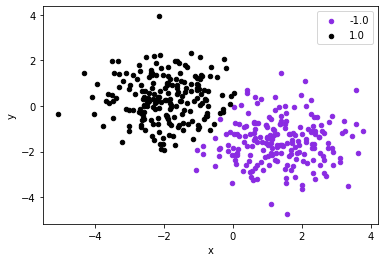

In [20]:
plot_points(X_unlabeled, label_normalizer(y_unlabeled_pred), [0, 1])

### <b>Randomized Block Coordinate Gradient Decent</b>

Since we want to be faster, we just want to calculate a part of derivative. Therefore, we change the derivative function for randomized and gaussian southwell

In [21]:
learning_rate = 0.0001
num_iterations = 100

Block_size = 1
Num_Block = int(y_unlabeled.shape[0] / Block_size)

cost_func_RBCGD, acc_val_RBCGD, time_tracking_RBCGD, time_RBCGD, y_unlabeled = rbcgd_method(wij, wij_bar, y_unlabeled, y_labeled, learning_rate, num_iterations, Num_Block, Block_size)

Randomized BCGD
CPU time: 0.328125


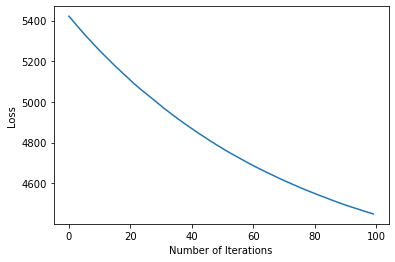

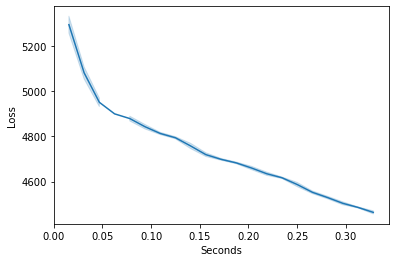

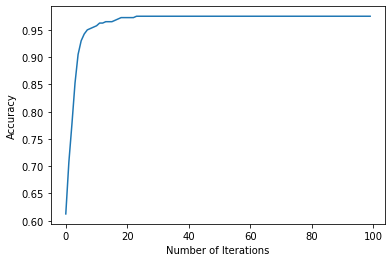

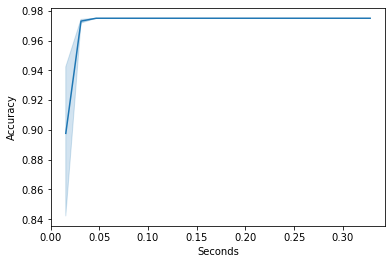

In [22]:
plot_learnin_curve(time_RBCGD, cost_func_RBCGD, time_tracking_RBCGD, acc_val_RBCGD, 'Randomized BCGD')

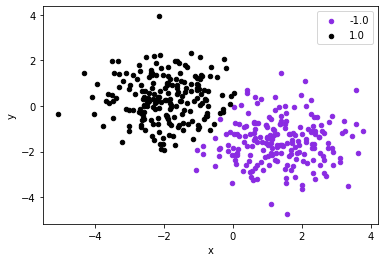

In [23]:
plot_points(X_unlabeled, label_normalizer(y_unlabeled_pred), [0, 1])

### <b>Block Coordinate Gradient Descent with Gaussian Southwell</b>

In [34]:
learning_rate = 0.001
num_iterations = 100


Block_size = 1
Num_Block = int(y_unlabeled.shape[0] / Block_size)

cost_func_BCGDGS, acc_val_BCGDGS, time_tracking_BCGDGS, time_BCGDGS, y_unlabeled = bcgdgs_method(wij, wij_bar, y_unlabeled, y_labeled, learning_rate, num_iterations, Num_Block, Block_size)

BCGD with Gaussian Southwell
CPU time: 23.640625


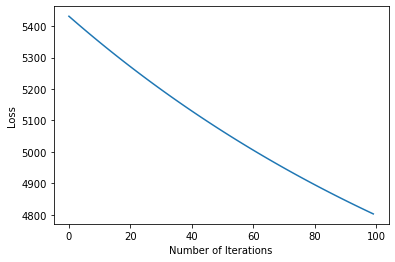

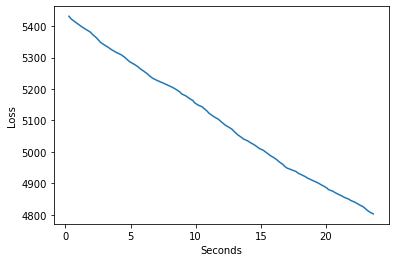

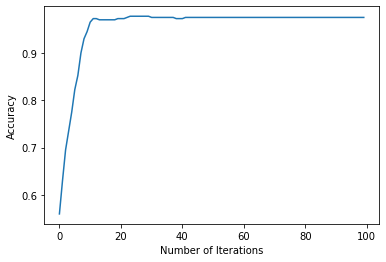

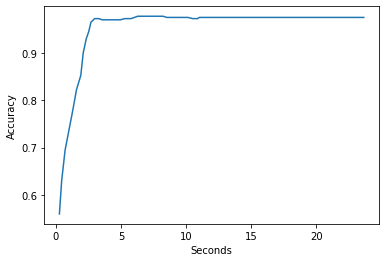

In [35]:
plot_learnin_curve(time_BCGDGS, cost_func_BCGDGS, time_tracking_BCGDGS, acc_val_BCGDGS, 'BCGD with Gaussian Southwell')

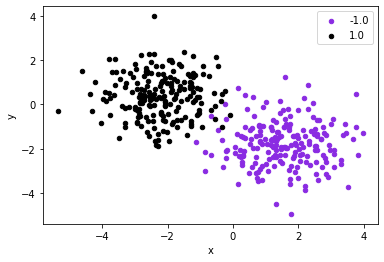

In [36]:
plot_points(X_unlabeled, label_normalizer(y_unlabeled_pred), [0, 1])

## Comparison of all three methods

In [37]:
def cost_plot_comparison(times, cost_funcs, time_trackings):
    print("GD CPU time:", times[0])
    print("RBCGD CPU time:", times[1])
    print("BCGDGS CPU time:", times[2])

    sns.lineplot(x= range(len(cost_funcs[0])),y=cost_funcs[0], label='GD', linestyle="--",color="black",linewidth = 4)
    sns.lineplot(x = range(len(cost_funcs[1])),y = cost_funcs[1], label='RBCGD',color="orange",linewidth = 2)
    sns.lineplot(x = range(len(cost_funcs[2])),y = cost_funcs[2], label='BCGDGS')
    plt.xlabel("Number of Iterations")
    plt.ylabel("cost")
    plt.show()

    sns.lineplot(x= time_trackings[0],y=cost_funcs[0], label='GD')
    sns.lineplot(x = time_trackings[1], y = cost_funcs[1], label='RBCGD')
    sns.lineplot(x = time_trackings[2], y = cost_funcs[1], label='BCGDGS')
    plt.xlabel("Seconds")
    plt.ylabel("Cost")
    plt.show()
    return

GD CPU time: 0.109375
RBCGD CPU time: 0.328125
BCGDGS CPU time: 23.640625


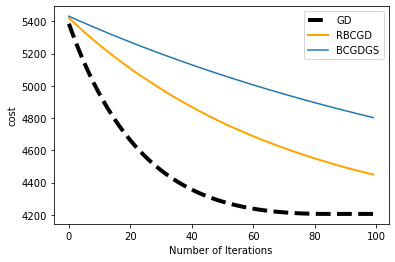

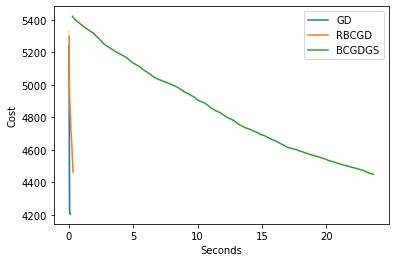

In [38]:
cost_plot_comparison([time_GD, time_RBCGD, time_BCGDGS], [cost_func_GD, cost_func_RBCGD, cost_func_BCGDGS], [time_tracking_GD, time_tracking_RBCGD, time_tracking_BCGDGS])

In [39]:
def Acc_plot_comparison(times, acc_val, time_trackings):
    print("GD CPU time:", times[0])
    print("RBCGD CPU time:", times[1])
    print("BCGDGS CPU time:", times[2])

    sns.lineplot(x= range(len(acc_val[0])),y=acc_val[0], label='GD', linestyle="--",color="black",linewidth = 4)
    sns.lineplot(x = range(len(acc_val[1])),y = acc_val[1], label='RBCGD',color="orange",linewidth = 2)
    sns.lineplot(x = range(len(acc_val[2])),y = acc_val[2], label='BCGDGS')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.show()

    sns.lineplot(x= time_trackings[0],y=acc_val[0], label='GD')
    sns.lineplot(x = time_trackings[1], y = acc_val[1], label='RBCGD')
    sns.lineplot(x = time_trackings[2], y = acc_val[1], label='BCGDGS')
    plt.xlabel("Seconds")
    plt.ylabel("Accuracy")
    plt.show()
    return

GD CPU time: 0.109375
RBCGD CPU time: 0.328125
BCGDGS CPU time: 23.640625


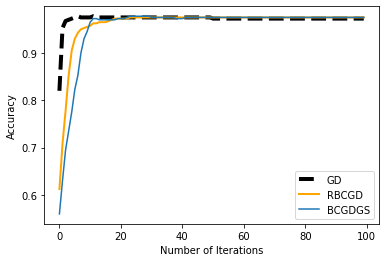

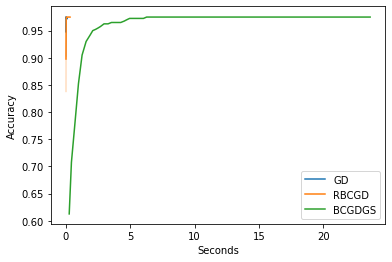

In [40]:
Acc_plot_comparison([time_GD, time_RBCGD, time_BCGDGS], [acc_val_GD, acc_val_RBCGD, acc_val_BCGDGS], [time_tracking_GD, time_tracking_RBCGD, time_tracking_BCGDGS])

## Testing the methods with the public dataset

In [239]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
dataset = pd.read_csv(url, header=None)
dataset[57] = dataset[57].replace({1: 1, 0: -1})

random_indices = np.random.choice(dataset.shape[0], size = 350, replace=False)
dataset = dataset.iloc[random_indices, :]

X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values

In [240]:
X_unlabeled, X_labeled, y_unlabeled, y_labeled = train_test_split(X, y, test_size=0.2, random_state=42)

Size of X =  350
Size of y =  350

Size of Unlabeled X =  280
Size of Unlabeled y =  280

Size of Labeled X =  70
Size of Labeled y =  70



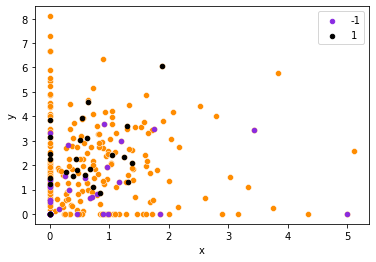

In [241]:
print("Size of X = ", X.shape[0])
print("Size of y = ", y.shape[0])
print()
print("Size of Unlabeled X = ", X_unlabeled.shape[0])
print("Size of Unlabeled y = ", y_unlabeled.shape[0])
print()
print("Size of Labeled X = ", X_labeled.shape[0])
print("Size of Labeled y = ", y_labeled.shape[0])
print()

data = pd.DataFrame(dict(x=X_labeled[:, 11], y=X_labeled[:, 18], label=y_labeled))
fig, ax = plt.subplots()
grouped = data.groupby('label')
sns.scatterplot(ax=ax, x=X[:, 11], y=X[:, 18], color='darkorange')
colors = {-1: 'blueviolet', 1: 'black'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [242]:
wij, wij_bar = similarity(X_unlabeled, X_labeled)

In [243]:
print(wij, wij.shape)

[[1.19103765e-015 7.85445445e-037 1.70118936e-090 ... 1.33566853e-226
  0.00000000e+000 4.92139302e-019]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  1.35471866e-077 0.00000000e+000]
 [1.08652049e-039 4.49121026e-019 7.85433857e-039 ... 2.15031796e-176
  0.00000000e+000 2.31063160e-036]
 ...
 [1.10975968e-139 2.98448121e-118 6.90619229e-065 ... 1.17894643e-088
  0.00000000e+000 2.88541056e-136]
 [1.16537939e-035 2.55024696e-016 5.28760568e-042 ... 4.45448445e-181
  0.00000000e+000 2.79750412e-032]
 [1.47751036e-126 8.66153015e-105 1.41876686e-053 ... 7.00842341e-095
  0.00000000e+000 3.46230090e-123]] (70, 280)


In [244]:
print(wij_bar, wij_bar.shape)

[[1.00000000e+000 3.05123206e-023 8.70162188e-077 ... 1.04035871e-213
  0.00000000e+000 3.26028333e-005]
 [3.05123206e-023 1.00000000e+000 9.22517647e-057 ... 2.34962010e-191
  0.00000000e+000 2.89691829e-020]
 [8.70162188e-077 9.22517647e-057 1.00000000e+000 ... 1.13749261e-146
  0.00000000e+000 2.40651379e-073]
 ...
 [1.04035871e-213 2.34962010e-191 1.13749261e-146 ... 1.00000000e+000
  0.00000000e+000 1.47320174e-210]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [3.26028333e-005 2.89691829e-020 2.40651379e-073 ... 1.47320174e-210
  0.00000000e+000 1.00000000e+000]] (280, 280)


### <b>Gradient Descent</b>


In [245]:
learning_rate = 0.001
num_iterations = 2000

cost_func_GD, acc_val_GD, time_tracking_GD, time_GD, y_unlabeled_pred = gd_method(wij, wij_bar, y_unlabeled, y_labeled, learning_rate, num_iterations)

Visualizing the result to see that the assignment is correct or not!

Gradient Descent
CPU time: 3.203125


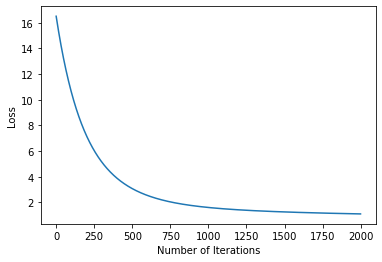

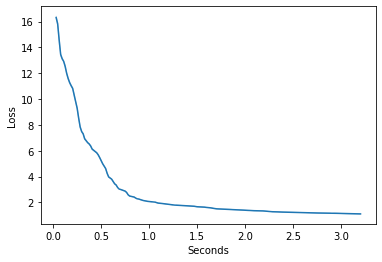

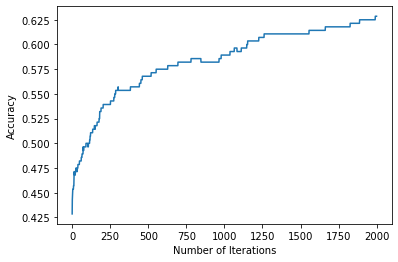

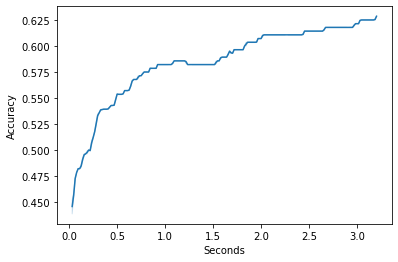

In [246]:
plot_learnin_curve(time_GD, cost_func_GD, time_tracking_GD, acc_val_GD, 'Gradient Descent')

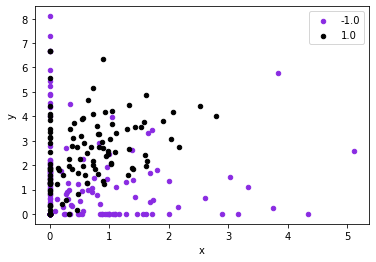

In [247]:
y_unlabel1 = np.round((y_unlabeled + 1) / 2) * 2 - 1

plot_points(X_unlabeled, y_unlabel1, [11, 18])

### <b>Randomized Block Coordinate Gradient Decent</b>

Since we want to be faster, we just want to calculate a part of derivative. Therefore, we change the derivative function for randomized and cyclic. methods.

In [248]:
learning_rate = 0.001
num_iterations = 2000

Block_size = 1
Num_Block = int(y_unlabeled.shape[0] / Block_size)

cost_func_RBCGD, acc_val_RBCGD, time_tracking_RBCGD, time_RBCGD, y_unlabeled = rbcgd_method(wij, wij_bar, y_unlabeled, y_labeled, learning_rate, num_iterations, Num_Block, Block_size)

Randomized BCGD
CPU time: 16.328125


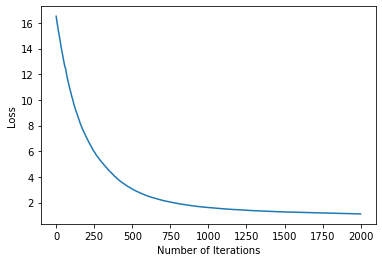

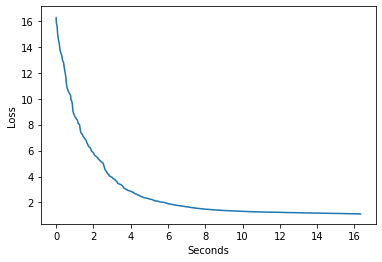

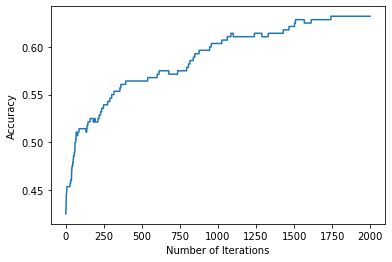

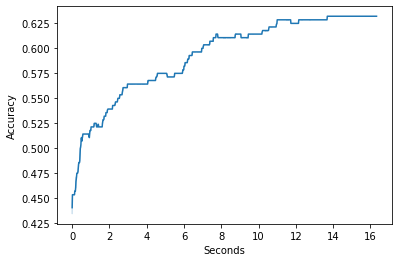

In [249]:
plot_learnin_curve(time_RBCGD, cost_func_RBCGD, time_tracking_RBCGD, acc_val_RBCGD, 'Randomized BCGD')

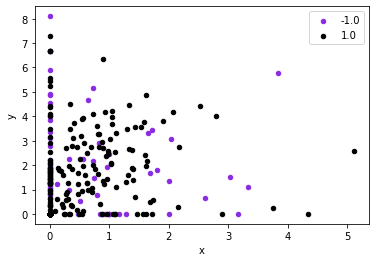

In [250]:
y_unlabel2 = np.round((y_unlabeled + 1) / 2 ) * 2 - 1

plot_points(X_unlabeled, y_unlabel2, [11, 18])

### <b>Block Coordinate Gradient Decent with Gaussian Southwell</b>

In [230]:
learning_rate = 0.001
num_iterations = 2000


Block_size = 1
Num_Block = int(y_unlabeled.shape[0] / Block_size)

cost_func_BCGDGS, acc_val_BCGDGS, time_tracking_BCGDGS, time_BCGDGS, y_unlabeled = bcgdgs_method(wij, wij_bar, y_unlabeled, y_labeled, learning_rate, num_iterations, Num_Block, Block_size)

BCGD with Gaussian Southwell
CPU time: 98.265625


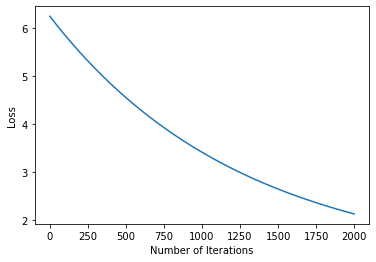

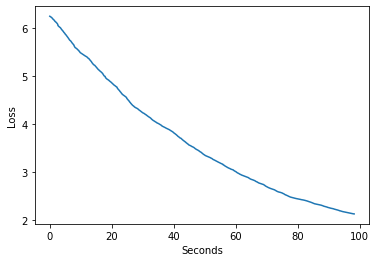

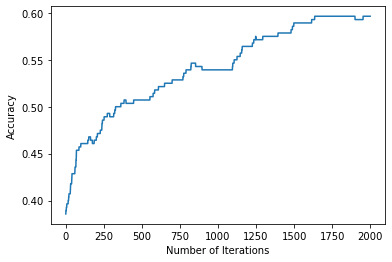

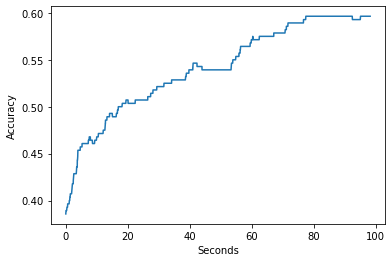

In [231]:
plot_learnin_curve(time_BCGDGS, cost_func_BCGDGS, time_tracking_BCGDGS, acc_val_BCGDGS, 'BCGD with Gaussian Southwell')

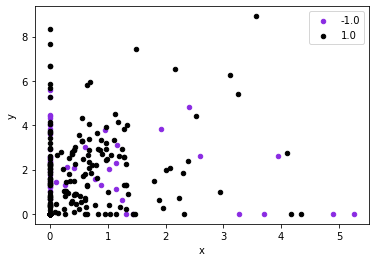

In [232]:
y_unlabel3 = np.round((y_unlabeled + 1) / 2 ) * 2 - 1

plot_points(X_unlabeled, y_unlabel3, [11, 18])

## Comparison of all three methods

GD CPU time: 3.203125
RBCGD CPU time: 16.328125
BCGDGS CPU time: 98.265625


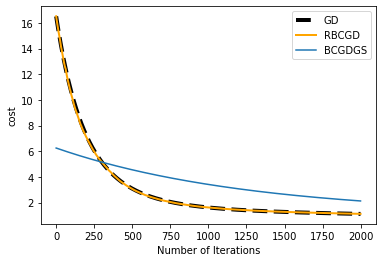

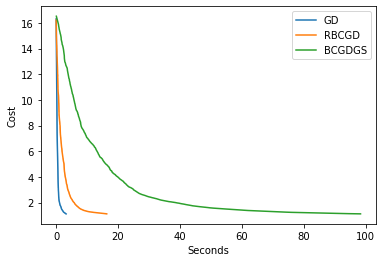

In [251]:
cost_plot_comparison([time_GD, time_RBCGD, time_BCGDGS], [cost_func_GD, cost_func_RBCGD, cost_func_BCGDGS], [time_tracking_GD, time_tracking_RBCGD, time_tracking_BCGDGS])

GD CPU time: 3.203125
RBCGD CPU time: 16.328125
BCGDGS CPU time: 98.265625


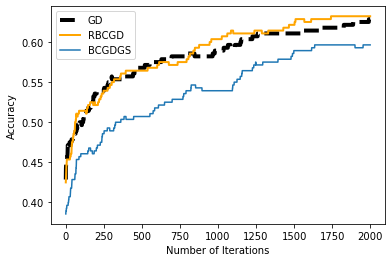

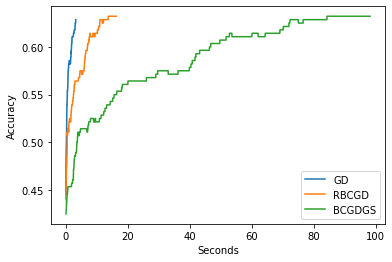

In [252]:
Acc_plot_comparison([time_GD, time_RBCGD, time_BCGDGS], [acc_val_GD, acc_val_RBCGD, acc_val_BCGDGS], [time_tracking_GD, time_tracking_RBCGD, time_tracking_BCGDGS])